# CODE TO TRAIN A SIMPLE PERCEPTRON 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

D:\DataSience\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# example making new class predictions for a classification problem
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

speed_data = pd.read_csv("speed_decision_data.csv")

In [3]:
speed_data.head()

1 - Distance From Bump  Height of Bump  Speed
0                0.575374        0.680337      0
1                0.376002        0.278661      1
2                0.973890        0.741585      0
3                0.310378        0.342374      1
4                0.109521        0.268304      1

<Axes: xlabel='1 - Distance From Bump', ylabel='Height of Bump'>

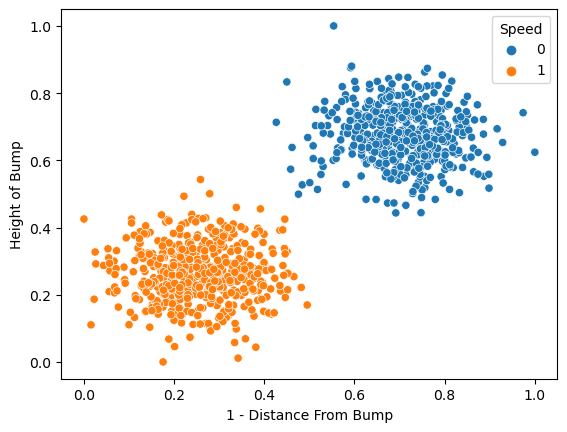

In [4]:
sns.scatterplot(x=speed_data['1 - Distance From Bump'], y=speed_data['Height of Bump'], hue = speed_data['Speed'])

In [5]:
X_train = speed_data[['1 - Distance From Bump', 'Height of Bump']]

In [6]:
y_train = speed_data['Speed']

In [7]:
# Adam optimizer is a specialized gradient-descent algorithm that uses the gradient to traint the network.
# Adam optimizer uses backpropagation algorithm to first compute the gradient of the function. 

In [8]:
# define and fit the final model
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')
model.fit(X_train, y_train, epochs=100, verbose=2)

Epoch 1/100


D:\DataSience\Anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 1s - 18ms/step - loss: 0.6329
Epoch 2/100
32/32 - 0s - 2ms/step - loss: 0.6279
Epoch 3/100
32/32 - 0s - 1ms/step - loss: 0.6224
Epoch 4/100
32/32 - 0s - 1ms/step - loss: 0.6176
Epoch 5/100
32/32 - 0s - 1ms/step - loss: 0.6110
Epoch 6/100
32/32 - 0s - 1ms/step - loss: 0.6074
Epoch 7/100
32/32 - 0s - 1ms/step - loss: 0.6032
Epoch 8/100
32/32 - 0s - 1ms/step - loss: 0.5969
Epoch 9/100
32/32 - 0s - 1ms/step - loss: 0.5925
Epoch 10/100
32/32 - 0s - 2ms/step - loss: 0.5884
Epoch 11/100
32/32 - 0s - 2ms/step - loss: 0.5812
Epoch 12/100
32/32 - 0s - 2ms/step - loss: 0.5777
Epoch 13/100
32/32 - 0s - 2ms/step - loss: 0.5728
Epoch 14/100
32/32 - 0s - 2ms/step - loss: 0.5709
Epoch 15/100
32/32 - 0s - 2ms/step - loss: 0.5635
Epoch 16/100
32/32 - 0s - 1ms/step - loss: 0.5608
Epoch 17/100
32/32 - 0s - 2ms/step - loss: 0.5568
Epoch 18/100
32/32 - 0s - 2ms/step - loss: 0.5528
Epoch 19/100
32/32 - 0s - 2ms/step - loss: 0.5475
Epoch 20/100
32/32 - 0s - 2ms/step - loss: 0.5420
Epoch 21/100
32/32 -

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11 (48.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 8 (36.00 B)

In [10]:
# make a prediction
#y_train_predict = model.predict_classes(X_train)  Deprecated syntax, although it was a lot simpler...
y_train_predict = (model.predict(X_train) > 0.5).astype("int32")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


<Axes: >

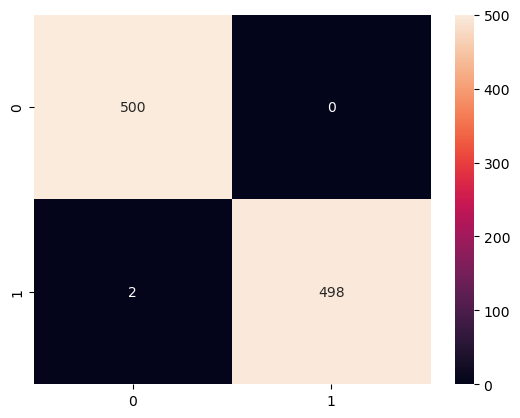

In [11]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train, y_train_predict)

sns.heatmap(cm, annot=True, fmt="d")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 647us/step


C:\Users\dvora\AppData\Local\Temp\ipykernel_15120\2382345974.py:15: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],


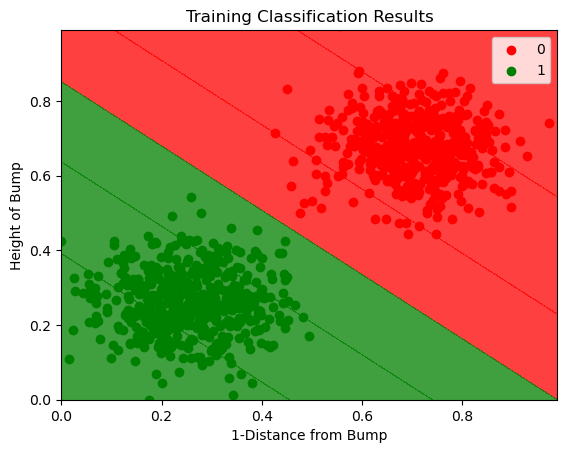

In [12]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_grid, y_grid = X_train.values, y_train.values

X1, X2 = np.meshgrid(np.arange(start = X_grid[:, 0].min() , stop = X_grid[:, 0].max(), step = 0.01),
                     np.arange(start = X_grid[:, 1].min(), stop = X_grid[:, 1].max(), step = 0.01))

plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_grid)):
    plt.scatter(X_grid[y_grid == j, 0], X_grid[y_grid == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
plt.title('Training Classification Results')
plt.xlabel('1-Distance from Bump')
plt.ylabel('Height of Bump')
plt.legend()
plt.show()

In [13]:
weights, biases = model.layers[0].get_weights()

In [14]:
weights

array([[-2.4290318],
       [-2.8230107]], dtype=float32)

In [15]:
biases

array([2.2034662], dtype=float32)